In [ ]:
# import neccessary dependencies
import pandas as pd
import matplotlib.pyplot as plt

inflation_data = pd.read_csv('/content/Inflation_Rates_Transformed-1.csv')
exchange_rate_data = pd.read_csv('/content/USD_INR_Exchange_Rates_1980_2024.csv')

exchange_rate_data.head()

,Year,Average Exchange Rate (INR/USD)
0,2003,45.476087
1,2004,45.188604
2,2005,44.003753
3,2006,45.183561
4,2007,41.192248


In [ ]:
inflation_data.head()

,Country,Year,Inflation Rate
0,India,1980,11.3
1,United States,1980,13.5
2,Emerging market and developing economies,1980,26.0
3,India,1981,12.7
4,United States,1981,10.4


In [ ]:
# filter the inflation data for India and the United States
inflation_filtered_df = inflation_data[inflation_data['Country'].isin(['India', 'United States'])]

# pivot the inflation data to have separate columns for India and the United States inflation rates
inflation_pivot_df = inflation_filtered_df.pivot(index='Year', columns='Country', values='Inflation Rate').reset_index()

# merge the exchange rates data with the inflation data
merged_df = pd.merge(exchange_rate_data, inflation_pivot_df, on='Year')

# renaming columns
merged_df.columns = ['Year', 'Exchange Rate (INR/USD)', 'Inflation Rate (India)', 'Inflation Rate (United States)']

merged_df.head()

,Year,Exchange Rate (INR/USD),Inflation Rate (India),Inflation Rate (United States)
0,2003,45.476087,4.1,2.3
1,2004,45.188604,4.0,2.7
2,2005,44.003753,3.7,3.4
3,2006,45.183561,6.7,3.2
4,2007,41.192248,5.9,2.9


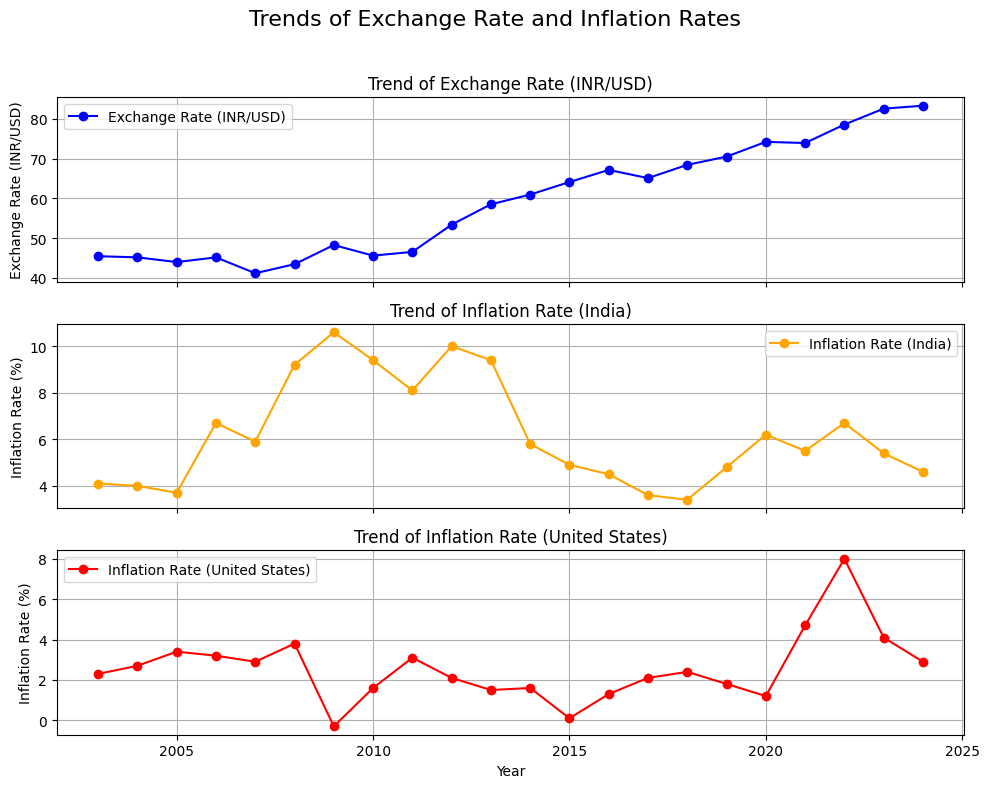

In [ ]:

# Create figure and axes
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot 1: Exchange Rate (INR/USD)
axs[0].plot(merged_df['Year'], merged_df['Exchange Rate (INR/USD)'],
            color='blue', marker='o', label='Exchange Rate (INR/USD)')
axs[0].set_title("Trend of Exchange Rate (INR/USD)")
axs[0].set_ylabel("Exchange Rate (INR/USD)")
axs[0].legend()
axs[0].grid(True)  # Enable grid lines for the first subplot


# Plot 2: Inflation Rate (India)
axs[1].plot(merged_df['Year'], merged_df['Inflation Rate (India)'],
            color='orange', marker='o', label='Inflation Rate (India)')
axs[1].set_title("Trend of Inflation Rate (India)")
axs[1].set_ylabel("Inflation Rate (%)")
axs[1].legend()
axs[1].grid(True)  # Enable grid lines for the first subplot


# Plot 3: Inflation Rate (United States)
axs[2].plot(merged_df['Year'], merged_df['Inflation Rate (United States)'],
            color='red', marker='o', label='Inflation Rate (United States)')
axs[2].set_title("Trend of Inflation Rate (United States)")
axs[2].set_xlabel("Year")
axs[2].set_ylabel("Inflation Rate (%)")
axs[2].legend()
axs[2].grid(True)  # Enable grid lines for the first subplot


# Set overall title and improve spacing
fig.suptitle("Trends of Exchange Rate and Inflation Rates", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for suptitle

# Show the plot
plt.show()


In [ ]:
correlation_matrix = merged_df[['Exchange Rate (INR/USD)',
                                'Inflation Rate (India)',
                                'Inflation Rate (United States)']].corr()

correlation_matrix

,Exchange Rate (INR/USD),Inflation Rate (India),Inflation Rate (United States)
Exchange Rate (INR/USD),1.000000,-0.337748,0.235321
Inflation Rate (India),-0.337748,1.000000,-0.120503
Inflation Rate (United States),0.235321,-0.120503,1.000000


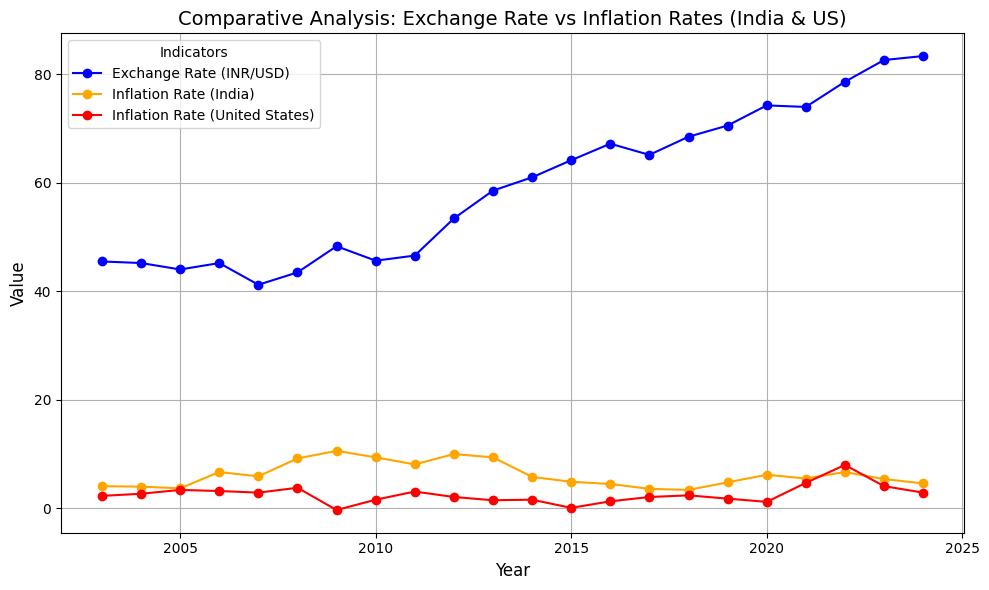

In [ ]:

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot: Exchange Rate (INR/USD)
plt.plot(merged_df['Year'], merged_df['Exchange Rate (INR/USD)'],
         marker='o', color='blue', label='Exchange Rate (INR/USD)')

# Plot: Inflation Rate (India)
plt.plot(merged_df['Year'], merged_df['Inflation Rate (India)'],
         marker='o', color='orange', label='Inflation Rate (India)')

# Plot: Inflation Rate (United States)
plt.plot(merged_df['Year'], merged_df['Inflation Rate (United States)'],
         marker='o', color='red', label='Inflation Rate (United States)')

# Title and labels
plt.title('Comparative Analysis: Exchange Rate vs Inflation Rates (India & US)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Display legend
plt.legend(title='Indicators')

# Show grid lines for better visibility
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


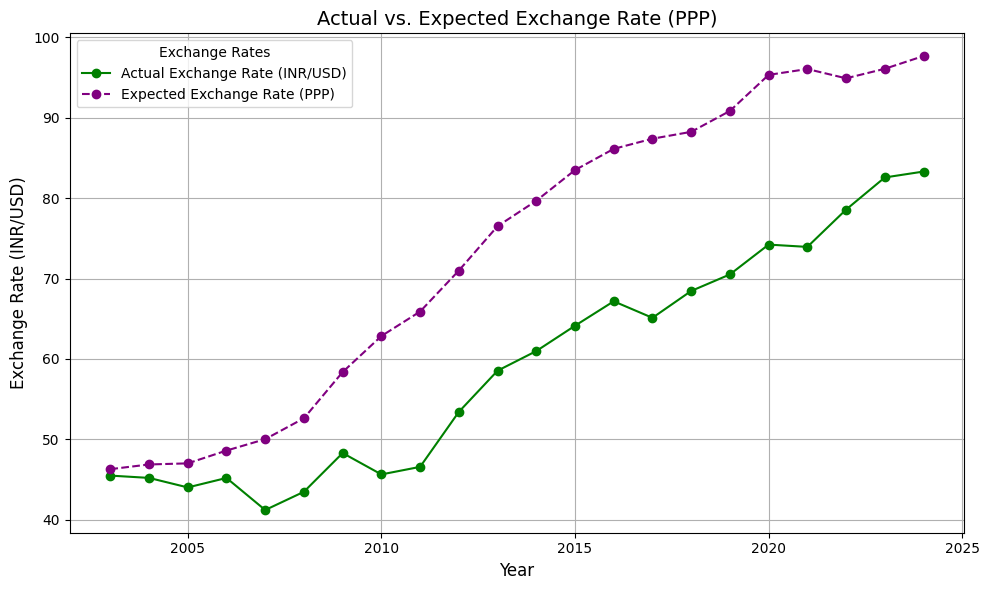

In [ ]:

# Calculate expected exchange rate based on PPP
initial_exchange_rate = merged_df['Exchange Rate (INR/USD)'].iloc[0]

merged_df['Expected Exchange Rate (PPP)'] = initial_exchange_rate * (
    (1 + merged_df['Inflation Rate (India)'] / 100) / (1 + merged_df['Inflation Rate (United States)'] / 100)
).cumprod()

# Create the plot
plt.figure(figsize=(10, 6))

# Plot: Actual Exchange Rate (INR/USD)
plt.plot(merged_df['Year'], merged_df['Exchange Rate (INR/USD)'],
         marker='o', color='green', label='Actual Exchange Rate (INR/USD)')

# Plot: Expected Exchange Rate (PPP)
plt.plot(merged_df['Year'], merged_df['Expected Exchange Rate (PPP)'],
         marker='o', color='purple', linestyle='--', label='Expected Exchange Rate (PPP)')

# Title and labels
plt.title('Actual vs. Expected Exchange Rate (PPP)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Exchange Rate (INR/USD)', fontsize=12)

# Display legend
plt.legend(title='Exchange Rates')

# Show grid lines for better visibility
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
